### Import Dependencies

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

### Load Data

In [2]:
file = 'preprocessed_data.csv'
df = pd.read_csv(file)
df.head()

,Company Name,City,State,Item/Bottle Count,Year,Month,Day
0,3,13262,38,6.0,2019,11,18
1,3,2208,9,12.0,2019,11,14
2,3,2052,14,6.0,2019,11,13
3,3,12759,31,12.0,2019,11,14
4,3,11113,20,6.0,2019,11,13


### Split Data into Training and Test sets: Option 1
- Split data by taking random samples from each month of the year (ex: use train_test_split on January data, then February data, then March data, etc.) And then combine all the samples into training data representing all months, and test data representing all months.

- *Note: RandomForestRegressor does not require data to be scaled*


In [3]:
# Option 1 Train/Test data: split data by month
jan_df = df.loc[df['Month'] == 1]
feb_df = df.loc[df['Month'] == 2]
mar_df = df.loc[df['Month'] == 3]
apr_df = df.loc[df['Month'] == 4]
may_df = df.loc[df['Month'] == 5]
june_df = df.loc[df['Month'] == 6]
july_df = df.loc[df['Month'] == 7]
aug_df = df.loc[df['Month'] == 8]
sep_df = df.loc[df['Month'] == 9]
oct_df = df.loc[df['Month'] == 10]
nov_df = df.loc[df['Month'] == 11]
dec_df = df.loc[df['Month'] == 12]


In [4]:
# Option 1 Train/Test data(cont.): get random training data from each month

# January
X_jan = jan_df.drop(columns=['Item/Bottle Count'], axis=1)
y_jan = jan_df['Item/Bottle Count']
X_train_jan, X_test_jan, y_train_jan, y_test_jan = train_test_split(X_jan, y_jan, random_state=1)

# February
X_feb = feb_df.drop(columns=['Item/Bottle Count'], axis=1)
y_feb = feb_df['Item/Bottle Count']
X_train_feb, X_test_feb, y_train_feb, y_test_feb = train_test_split(X_feb, y_feb, random_state=1)

# March
X_mar = mar_df.drop(columns=['Item/Bottle Count'], axis=1)
y_mar = mar_df['Item/Bottle Count']
X_train_mar, X_test_mar, y_train_mar, y_test_mar = train_test_split(X_mar, y_mar, random_state=1)

# April
X_apr = apr_df.drop(columns=['Item/Bottle Count'], axis=1)
y_apr = apr_df['Item/Bottle Count']
X_train_apr, X_test_apr, y_train_apr, y_test_apr = train_test_split(X_apr, y_apr, random_state=1)

# May
X_may = may_df.drop(columns=['Item/Bottle Count'], axis=1)
y_may = may_df['Item/Bottle Count']
X_train_may, X_test_may, y_train_may, y_test_may = train_test_split(X_may, y_may, random_state=1)

# June
X_june = june_df.drop(columns=['Item/Bottle Count'], axis=1)
y_june = june_df['Item/Bottle Count']
X_train_june, X_test_june, y_train_june, y_test_june = train_test_split(X_june, y_june, random_state=1)

# July
X_july = july_df.drop(columns=['Item/Bottle Count'], axis=1)
y_july = july_df['Item/Bottle Count']
X_train_july, X_test_july, y_train_july, y_test_july = train_test_split(X_july, y_july, random_state=1)

# August
X_aug = aug_df.drop(columns=['Item/Bottle Count'], axis=1)
y_aug = aug_df['Item/Bottle Count']
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_aug, y_aug, random_state=1)

# September
X_sep = sep_df.drop(columns=['Item/Bottle Count'], axis=1)
y_sep = sep_df['Item/Bottle Count']
X_train_sep, X_test_sep, y_train_sep, y_test_sep = train_test_split(X_sep, y_sep, random_state=1)

# October
X_oct = oct_df.drop(columns=['Item/Bottle Count'], axis=1)
y_oct = oct_df['Item/Bottle Count']
X_train_oct, X_test_oct, y_train_oct, y_test_oct = train_test_split(X_oct, y_oct, random_state=1)

# November
X_nov = nov_df.drop(columns=['Item/Bottle Count'], axis=1)
y_nov = nov_df['Item/Bottle Count']
X_train_nov, X_test_nov, y_train_nov, y_test_nov = train_test_split(X_nov, y_nov, random_state=1)

# December
X_dec = dec_df.drop(columns=['Item/Bottle Count'], axis=1)
y_dec = dec_df['Item/Bottle Count']
X_train_dec, X_test_dec, y_train_dec, y_test_dec = train_test_split(X_dec, y_dec, random_state=1)


In [5]:
# Option 1 Train/Test data(cont.): combine training and test data from all months into X_train_all, X_test_all, y_train_all, y_test_all
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

X_train_all = pd.concat([X_train_jan,
    X_train_feb,
    X_train_mar,
    X_train_apr,
    X_train_may,
    X_train_june,
    X_train_july,
    X_train_aug,
    X_train_sep,
    X_train_oct,
    X_train_nov,
    X_train_dec])

X_test_all = pd.concat([X_test_jan,
    X_test_feb,
    X_test_mar,
    X_test_apr,
    X_test_may,
    X_test_june,
    X_test_july,
    X_test_aug,
    X_test_sep,
    X_test_oct,
    X_test_nov,
    X_test_dec])

y_train_all = pd.concat([y_train_jan,
    y_train_feb,
    y_train_mar,
    y_train_apr,
    y_train_may,
    y_train_june,
    y_train_july,
    y_train_aug,
    y_train_sep,
    y_train_oct,
    y_train_nov,
    y_train_dec])

y_test_all = pd.concat([y_test_jan,
    y_test_feb,
    y_test_mar,
    y_test_apr,
    y_test_may,
    y_test_june,
    y_test_july,
    y_test_aug,
    y_test_sep,
    y_test_oct,
    y_test_nov,
    y_test_dec])

print(X_train_all.shape, y_train_all.shape,
    X_test_all.shape, y_test_all.shape)

(475361, 6) (475361,) (158460, 6) (158460,)


### Build RandomForestRegressor Model

In [6]:
# Option 1 Train/Test data
regr_1 = RandomForestRegressor(max_depth=None, random_state=0)
regr_1.fit(X_train_all,y_train_all)

# WILL TAKE ABOUT 3 MINUTES TO COMPLETE

RandomForestRegressor(random_state=0)

In [7]:
# Option 1 Train/Test data
y_pred1 = regr_1.predict(X_test_all)

### Evaluate the Model

In [8]:
# Scores for model with Option 1 Train/Test data

print("Evaluate model: Option 1 Train/Test data")
print("----------------------------------------")
# Training Score
print("Training R-Squared:", regr_1.score(X_train_all,y_train_all))

# Test Score
print("Test R-Squared: ", regr_1.score(X_test_all, y_test_all))

# Root Mean Squared Error
print("Root Mean Squared Error: ", mean_squared_error(y_test_all, y_pred1, squared=False))

# Mean Absolute Error
print("Mean Absolute Error: ", mean_absolute_error(y_test_all, y_pred1))

Evaluate model: Option 1 Train/Test data
----------------------------------------
Training R-Squared: 0.8624742355735865
Test R-Squared:  0.5943922118876332
Root Mean Squared Error:  12.685259687650218
Mean Absolute Error:  1.7630350640569152


In [9]:
# cerate df to hold results
results_df = pd.DataFrame({
    "Actual": y_test_all,
    "Predicted": y_pred1
})
all_results_df = pd.merge(X_test_all, results_df, on=results_df.index)
all_results_df.set_index(['key_0'])

,Company Name,City,State,Year,Month,Day,Actual,Predicted
key_0,,,,,,,,
158269,3,13513,4,2020,1,17,6.0,2.530556
412227,2,339,10,2021,1,19,2.0,2.000000
394490,3,5879,19,2021,1,1,6.0,6.105000
411938,2,9255,3,2021,1,19,2.0,2.000000
413521,3,9270,9,2021,1,18,6.0,4.645429
...,...,...,...,...,...,...,...,...
78032,3,278,34,2019,12,25,6.0,6.624000
63959,3,11744,38,2019,12,5,8.0,7.742738
628082,1,9255,3,2021,12,23,3.0,3.625000


# ----------------------------------

### Split Data into Training and Test sets: Option 2
- Split data by using the 2019 and 2020 data for training and the 2021 data for testing. 

- *Note: RandomForestRegressor does not require data to be scaled*

In [10]:
# Option 2 Train/Test data: Train with 2019 and 2020, Test with 2021  -->  USE THIS OPTION ONCE MORE DATA IS AVAILABLE

train_2019_2020 = df.loc[(df['Year'] == 2019) | (df['Year'] == 2020) | (df['Month'] <= 6 )]
test_2021 = df.loc[(df['Year'] == 2021) & (df['Month'] > 6)]

X_train_2019_2020 = train_2019_2020.drop(columns=['Item/Bottle Count'], axis=1)
y_train_2019_2020 = train_2019_2020['Item/Bottle Count']

X_test_2021 = test_2021.drop(columns=['Item/Bottle Count'], axis=1)
y_test_2021 = test_2021['Item/Bottle Count']

### Build RandomForestRegressor Model

In [11]:
# Option 2 Train/Test data
regr_2 = RandomForestRegressor(max_depth=None, random_state=0)
regr_2.fit(X_train_2019_2020,y_train_2019_2020)

# WILL TAKE ABOUT 3 MINUTES TO COMPLETE

RandomForestRegressor(random_state=0)

In [12]:
# Option 2 Train/Test data
y_pred2 = regr_2.predict(X_test_2021)

### Evaluate the Model

In [13]:
# Scores for model with Option 2 Train/Test data
print("Evaluate model: Option 2 Train/Test data")
print("----------------------------------------")

# Training Score
print("Training R-Squared: ", regr_2.score(X_train_2019_2020,y_train_2019_2020))

# Test Score
print("Test R-Squared: ", regr_2.score(X_test_2021, y_test_2021))

# Root Mean Squared Error
print("Root Mean Squared Error: ", mean_squared_error(y_test_2021, y_pred2, squared=False))

# Mean Absolute Error
print("Mean Absolute Error: ", mean_absolute_error(y_test_2021, y_pred2))


# This model performs poorly and may be better to use once more years of data are available.

Evaluate model: Option 2 Train/Test data
----------------------------------------
Training R-Squared:  0.8721242265463877
Test R-Squared:  -7.881679147275898
Root Mean Squared Error:  10.458983938558172
Mean Absolute Error:  1.8668916751691174


### Visualize Model Results

In [14]:
 # cerate df to hold results
results2_df = pd.DataFrame({
    "Actual": y_test_2021,
    "Predicted": y_pred2
})
all_results2_df = pd.merge(X_test_2021, results2_df, on=results2_df.index)
all_results2_df = all_results2_df.set_index(['key_0'])

In [16]:
# Plot line graph with all three years of data and model predictions

# 2019 Data
actual_count_2019 = df.loc[df['Year'] == 2019].groupby(['Year', 'Month']).sum().drop(
    columns=['Company Name','City', 'State', 'Day'])
actual_count_2019.reset_index(inplace=True)

# 2020 Data
actual_count_2020 = df.loc[df['Year'] == 2020].groupby(['Year', 'Month']).sum().drop(
    columns=['Company Name','City', 'State', 'Day'])
actual_count_2020.reset_index(inplace=True)

# 2021 Data
actual_count_2021 = df.loc[df['Year'] == 2021].groupby(['Year', 'Month']).sum().drop(
    columns=['Company Name','City', 'State', 'Day'])
actual_count_2021.reset_index(inplace=True)

# Model Predictions
predicted_count = all_results2_df.groupby(['Year', 'Month']).sum().drop(
    columns=['Company Name','City', 'State', 'Day'])
predicted_count.reset_index(inplace=True)


In [17]:
# X-Axis: Months
x_2019 = actual_count_2019['Month']
x_2020 = actual_count_2020['Month']
x_2021 = actual_count_2021['Month']
x_pred = predicted_count['Month']

# Y-Axis: 2019, 2020, 2021, Predictions
y_2019 = actual_count_2019['Item/Bottle Count']
y_2020 = actual_count_2020['Item/Bottle Count']
y_2021 = actual_count_2021['Item/Bottle Count']
y_predicted = predicted_count['Predicted']


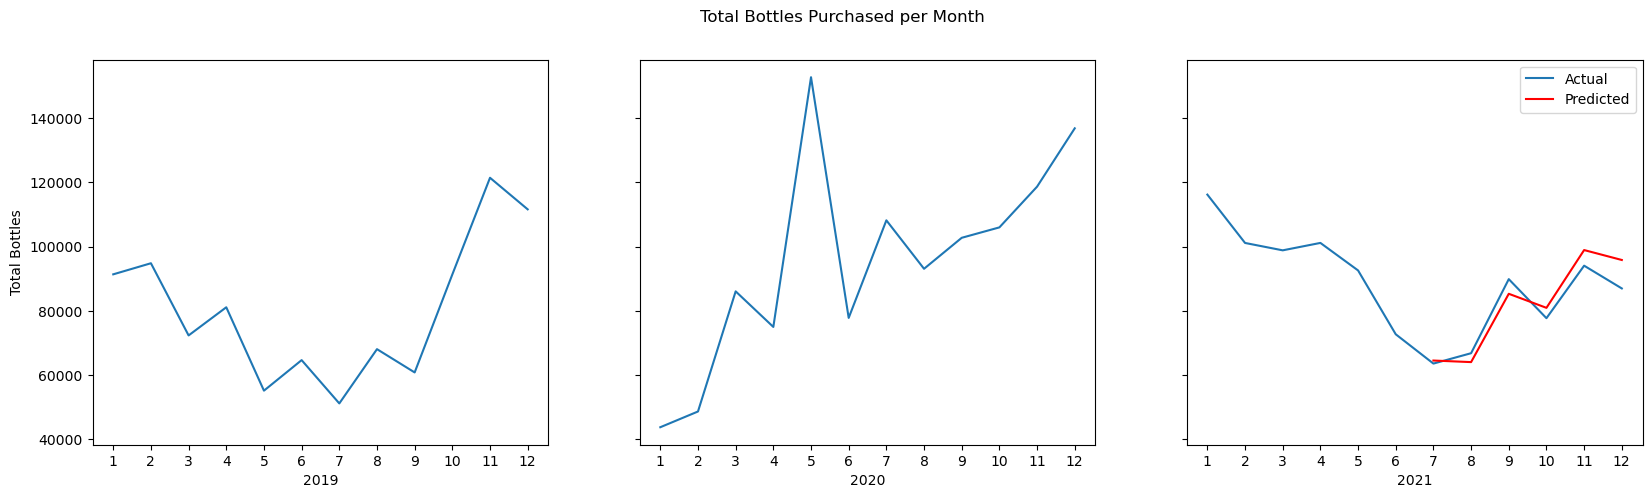

In [18]:
# Plot using multiple subplots
fig, axs = plt.subplots(1,3, sharey=True, figsize=[20,5])
fig.suptitle("Total Bottles Purchased per Month")

axs[0].plot(x_2019, y_2019)
axs[0].set_xlabel('2019')
axs[0].set_ylabel('Total Bottles')
axs[0].xaxis.set_ticks([1,2,3,4,5,6,7,8,9,10,11,12])

axs[1].plot(x_2020, y_2020)
axs[1].set_xlabel('2020')
axs[1].xaxis.set_ticks([1,2,3,4,5,6,7,8,9,10,11,12])

axs[2].plot(x_2021, y_2021, label='Actual')
axs[2].plot(x_pred, y_predicted, c='red', label='Predicted')
axs[2].set_xlabel('2021')
axs[2].xaxis.set_ticks([1,2,3,4,5,6,7,8,9,10,11,12])

axs[2].legend()